In [44]:
import pandas as pd
import shutil
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
path = 'задание/train.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,image_path,emotion
0,0,./train/anger/0.jpg,anger
1,1,./train/anger/1.jpg,anger
2,2,./train/anger/10.jpg,anger
3,3,./train/anger/100.jpg,anger
4,4,./train/anger/1000.jpg,anger


In [14]:
number_emotions = df.groupby(by='emotion')['Unnamed: 0'].nunique()

In [19]:
number_emotions.keys()

Index(['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise', 'uncertain'],
      dtype='object', name='emotion')

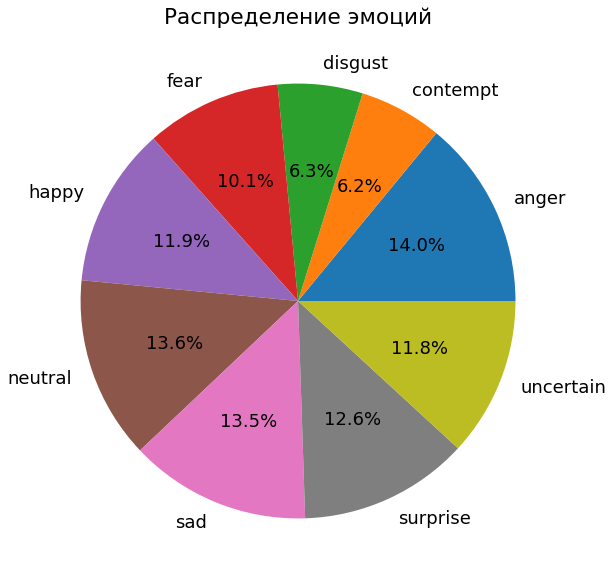

In [55]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10, 10))
labels = number_emotions.keys()
values = number_emotions.values
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.title('Распределение эмоций')
plt.show()

In [52]:
df.shape[0]

50046

In [24]:
# создание директорий
!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/val

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/train’: File exists
mkdir: cannot create directory ‘data/test’: File exists
mkdir: cannot create directory ‘data/val’: File exists


In [53]:
for folder in os.listdir('задание/train'):
    !mkdir data/train/{folder}
    !mkdir data/val/{folder}

mkdir: cannot create directory ‘data/train/anger’: File exists
mkdir: cannot create directory ‘data/train/contempt’: File exists
mkdir: cannot create directory ‘data/train/disgust’: File exists
mkdir: cannot create directory ‘data/train/fear’: File exists
mkdir: cannot create directory ‘data/train/happy’: File exists
mkdir: cannot create directory ‘data/train/neutral’: File exists
mkdir: cannot create directory ‘data/train/sad’: File exists
mkdir: cannot create directory ‘data/train/surprise’: File exists
mkdir: cannot create directory ‘data/train/uncertain’: File exists


In [36]:
# копирование train в папку даты
for folder in os.listdir('задание/train'):
    for file in os.listdir(f'задание/train/{folder}'):
        shutil.copy(f'задание/train/{folder}/{file}', f'data/train/{folder}')

In [54]:
# создание val в папке даты
for folder in os.listdir('data/train'):
    print(folder)
    _, val_image = train_test_split(os.listdir(f'data/train/{folder}'), test_size=0.2, random_state=42)
    for file in val_image:
        shutil.move(f'data/train/{folder}/{file}', f'data/val/{folder}/{file}')

anger
contempt
disgust
fear
happy
neutral
sad
surprise
uncertain


In [92]:
# копирование test в папку даты
for file in os.listdir(f'задание/test_kaggle'):
    shutil.copy(f'задание/test_kaggle/{file}', f'data/test/{file}')

In [99]:
df = pd.read_csv('задание/sample_submission.csv')
df.head()

,image_path,emotion
0,0.jpg,neutral
1,1.jpg,neutral
2,2.jpg,neutral
3,3.jpg,neutral
4,4.jpg,neutral


In [111]:
path = 'result/submission_file/20220223-162846_epoch_5.csv'

In [112]:
df = pd.read_csv(path)
df.head()

,image_path,emotion
0,0.jpg,sad
1,1.jpg,neutral
2,10.jpg,anger
3,100.jpg,surprise
4,1000.jpg,happy
